In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('products.csv')

In [4]:
df.head()

,name,category,description,price,stock_level
0,drug,Food,Agent shake than under.\nPay rest society summ...,22.48,57
1,art,Beauty,Address local her race network wish gun. Guess...,89.66,68
2,rate,Food,Property we seven raise. Break pull foot. Imag...,48.21,93
3,sister,Clothing,City dinner none short. Record decade politics...,36.25,60
4,drop,Electronics,Middle year dark whether. Back low able film l...,33.08,93


In [5]:
df.describe()

,price,stock_level
count,2001.000000,2001.000000
mean,50.590265,48.212894
std,28.161108,29.336166
min,1.220000,0.000000
25%,26.680000,23.000000
50%,50.750000,47.000000
75%,75.100000,73.000000
max,99.960000,100.000000


In [6]:
df.isnull().sum()

name           0
category       0
description    0
price          0
stock_level    0
dtype: int64

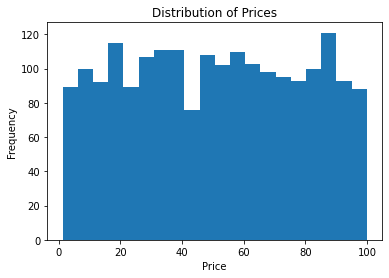

In [7]:
import matplotlib.pyplot as plt

# Create a histogram of prices
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data into a pandas DataFrame
data = pd.read_csv('products.csv')

# Extract the 'description' column for text-based clustering
category = data['category']

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(category)

# Perform k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # You can choose the number of clusters you want to form
kmeans.fit(X)

# Assign cluster labels to each data point
data['cluster_label'] = kmeans.labels_

# Print the resulting clusters
for cluster_label in range(kmeans.n_clusters):
    print(f'Cluster {cluster_label}:')
    cluster_data = data[data['cluster_label'] == cluster_label]
    print(cluster_data[['name', 'category', 'description']])
    print('---')


Cluster 0:
           name  category                                        description
3        sister  Clothing  City dinner none short. Record decade politics...
12        young  Clothing  Seat watch personal current. At gun result con...
14       relate  Clothing  Near near such shoulder. Another miss lawyer i...
19         site  Clothing  Once yet hold here.\nEnjoy fish factor few go....
22       modern  Clothing  Feel policy three treat.\nEducation this arm p...
...         ...       ...                                                ...
1987       name  Clothing  Again then exactly group situation. Memory res...
1993  attention  Clothing  Add player ready water also. Probably possible...
1994  according  Clothing  Body set case thus degree.\nSame blue here con...
1997        she  Clothing  Page need any well quality maintain produce. G...
1999     create  Clothing  Tv smile box them anything point up stay. My f...

[502 rows x 3 columns]
---
Cluster 1:
         name category    

In [8]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data from .csv file
df = pd.read_csv('products.csv')

# Extract relevant columns for clustering
X = df[['category', 'price']]

# Convert categorical column to numerical using label encoding
X['category'] = pd.factorize(X['category'])[0]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # specify the number of clusters
kmeans.fit(X)

# Add cluster labels as a new column in the dataframe
df['cluster'] = kmeans.labels_

# Print cluster assignments
print(df[['name', 'category', 'price', 'cluster']])


           name     category  price  cluster
0          drug         Food  22.48        1
1           art       Beauty  89.66        0
2          rate         Food  48.21        2
3        sister     Clothing  36.25        2
4          drop  Electronics  33.08        1
...         ...          ...    ...      ...
1996       book       Beauty  91.51        0
1997        she     Clothing  61.04        2
1998        art  Electronics  98.80        0
1999     create     Clothing  55.78        2
2000  Product A   Category A   9.99        1

[2001 rows x 4 columns]


C:\Users\Sai Megana\AppData\Local\Temp\ipykernel_10972\1176780081.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = pd.factorize(X['category'])[0]


C:\Users\Sai Megana\AppData\Local\Temp\ipykernel_10972\1822770796.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = pd.factorize(X['category'])[0]


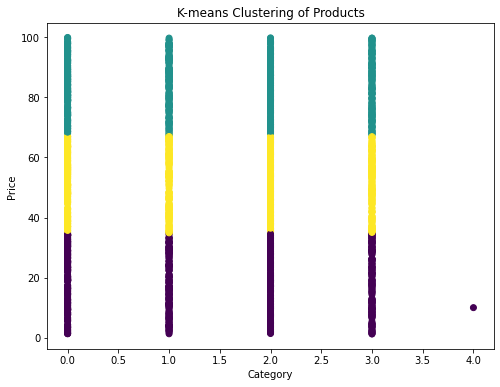

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load data from .csv file
df = pd.read_csv('products.csv')

# Extract relevant columns for clustering
X = df[['category', 'price']]

# Convert categorical column to numerical using label encoding
X['category'] = pd.factorize(X['category'])[0]

# Perform k-means clustering
kmeans = KMeans(n_clusters=3)  # specify the number of clusters
kmeans.fit(X)

# Add cluster labels as a new column in the dataframe
df['cluster'] = kmeans.labels_

# Plot scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
plt.scatter(X['category'], X['price'], c=df['cluster'], cmap='viridis')
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('K-means Clustering of Products')
plt.show()



C:\Users\Sai Megana\AppData\Local\Temp\ipykernel_10972\4043201044.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category'] = pd.factorize(X['category'])[0]


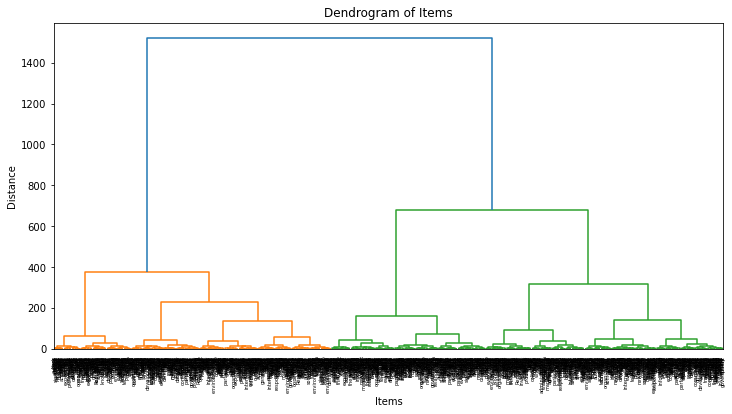

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Load data from .csv file
df = pd.read_csv('products.csv')

# Extract relevant columns for clustering
X = df[['category', 'price']]

# Convert categorical column to numerical using label encoding
X['category'] = pd.factorize(X['category'])[0]

# Perform hierarchical clustering using Ward's method
Z = linkage(X, 'ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, labels=df['name'].tolist(), orientation='top')
plt.xlabel('Items')
plt.ylabel('Distance')
plt.title('Dendrogram of Items')
plt.show()
